In [4]:
import numpy

In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import skimage.feature
from skimage.feature import hog
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

2022-12-18 17:08:02.905897: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [58]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

**SVC approach**

In [168]:
trnData=numpy.load('trnImage.npy')
trnLabels=numpy.load('trnLabel.npy')
tstData=numpy.load('tstImageS.npy')
tstLabels=numpy.load('tstLabelS.npy')
print("Train data shape= ", trnData.shape)
print("Test data shape= ", tstData.shape)


Train data shape=  (32, 32, 3, 10000)
Test data shape=  (32, 32, 3, 1000)


We have now loaded the numpy data and printed its shape

In [147]:
trnData = trnData.astype(numpy.float64)

trnDataHogs = []
for i in range(10000):
    image = trnData[:,:,:,i]
    trnDataHog = skimage.feature.hog(image, pixels_per_cell=[3,3], cells_per_block=[2,2], multichannel=True, orientations=9)
    trnDataHogs.append(trnDataHog)

trnDataHogs=numpy.array(trnDataHogs)
clf = SVC(kernel='rbf')
clf.fit(trnDataHogs, trnLabels)


/var/folders/dl/7jz716sd7y916tfjbr57xs5r0000gn/T/ipykernel_67918/1073850469.py:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  trnDataHog = skimage.feature.hog(image, pixels_per_cell=[3,3], cells_per_block=[2,2], multichannel=True, orientations=9)
/usr/local/Cellar/jupyterlab/3.4.8/libexec/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In this cell we retrieve the histograms of oriented gradients for each image of the training data. We then define the SVC model and fit it to out training data and labels.

In [148]:
tstData = tstData.astype(numpy.float64)

tstDataHogs = []
for i in range(1000):
    tstImage=tstData[:,:,:,i]
    tstDataHog = skimage.feature.hog(tstImage, pixels_per_cell=[3,3], cells_per_block=[2,2], multichannel=True, orientations=9)
    tstDataHogs.append(tstDataHog)
    
tstDataHogs=numpy.array(tstDataHogs)

/var/folders/dl/7jz716sd7y916tfjbr57xs5r0000gn/T/ipykernel_67918/2036161437.py:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  tstDataHog = skimage.feature.hog(tstImage, pixels_per_cell=[3,3], cells_per_block=[2,2], multichannel=True, orientations=9)


In this cell we retrieve the histograms of oriented gradients for each image of the test data.

In [149]:
testScore1 = clf.score(tstDataHogs, tstLabels)
print("Accuracy score for SVC model: ", testScore1)

Accuracy score for SVC model:  0.538


In [150]:
y_pred = clf.predict(tstDataHogs)
print(confusion_matrix(tstLabels, y_pred))

[[57  4  8  2  6  1  3  2 15  2]
 [ 5 61  4  1  3  0  5  1 14  6]
 [12  1 31 10 12 11 11  5  5  2]
 [ 3  1  9 42  8 16 10  6  2  3]
 [ 8  1  4  8 60  3 11  2  2  1]
 [ 1  1 12 18  7 45  9  5  1  1]
 [ 2  3  9  6 10  4 63  1  1  1]
 [ 0  1  6  9 10 13  0 56  2  3]
 [15 11  1  0  4  1  2  0 61  5]
 [ 6  4  3  0  8  3  2  3  9 62]]


Confusion matrix for SVC model on test data

**CNN approach**

In [169]:
trnData=numpy.moveaxis(trnData, 3, 0)
tstData=numpy.moveaxis(tstData, 3, 0)
print(tstData.shape)
print(trnData.shape)

(1000, 32, 32, 3)
(10000, 32, 32, 3)


We move the axis of the data for input to CNN

In [170]:
true_y = tstLabels

In [171]:
trnLabels = to_categorical(trnLabels)
tstLabels = to_categorical(tstLabels)

Converting labels to binary matricies.

In [172]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), kernel_initializer='he_uniform'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


Here we create the model and add 2 convilusional 2D layers, with input shape (32,32,3) using relu activation.
We then define a Adam optimizer.

In [173]:
history3 = model.fit(trnData, trnLabels, epochs=10, validation_data=(tstData, tstLabels), batch_size=64) 

Epoch 1/10
157/157 [==============================] - 23s 121ms/step - loss: 2.1197 - accuracy: 0.2314 - val_loss: 1.7500 - val_accuracy: 0.3620
Epoch 2/10
157/157 [==============================] - 22s 140ms/step - loss: 1.5845 - accuracy: 0.4307 - val_loss: 1.4745 - val_accuracy: 0.4700
Epoch 3/10
157/157 [==============================] - 21s 132ms/step - loss: 1.3934 - accuracy: 0.4945 - val_loss: 1.4033 - val_accuracy: 0.4940
Epoch 4/10
157/157 [==============================] - 28s 178ms/step - loss: 1.2853 - accuracy: 0.5358 - val_loss: 1.3798 - val_accuracy: 0.5110
Epoch 5/10
157/157 [==============================] - 32s 205ms/step - loss: 1.1541 - accuracy: 0.5812 - val_loss: 1.2720 - val_accuracy: 0.5520
Epoch 6/10
157/157 [==============================] - 24s 154ms/step - loss: 1.0461 - accuracy: 0.6291 - val_loss: 1.1984 - val_accuracy: 0.5910
Epoch 7/10
157/157 [==============================] - 23s 148ms/step - loss: 0.9375 - accuracy: 0.6690 - val_loss: 1.2367 - val_ac

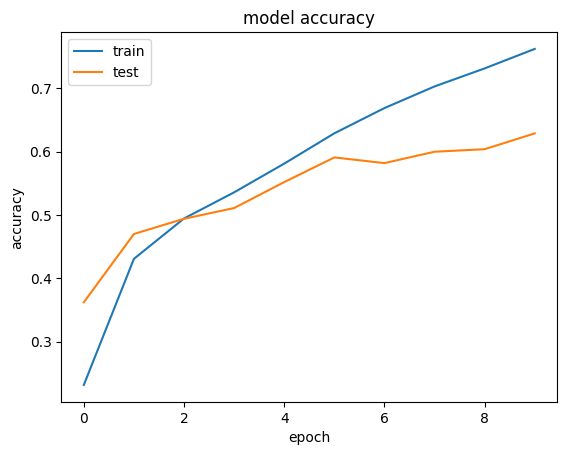

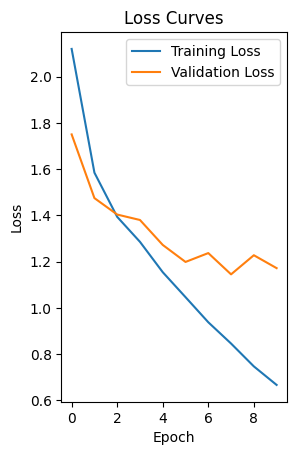

In [178]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.subplot(122)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [175]:
predictedLabels = numpy.argmax(model.predict(tstData), axis=1)

32/32 [==============================] - 1s 15ms/step


Predict classification of test data

In [177]:
print(confusion_matrix(true_y, predictedLabels))

[[59  4  8  1  3  4  0  1 13  7]
 [ 0 72  3  2  0  1  2  4  4 12]
 [ 8  0 52  5 11 10  5  7  1  1]
 [ 4  0 12 52  5 11  8  4  1  3]
 [ 2  0  6  6 58  4  9 10  1  4]
 [ 0  2 12 21  4 46  4  8  0  3]
 [ 0  0  9  4  6  2 76  1  0  2]
 [ 1  0  6 10  6  5  1 70  0  1]
 [ 6  6  3  1  4  0  2  0 75  3]
 [ 1 19  1  0  0  1  1  4  4 69]]


Confusion matrix for CNN model on test data